In [77]:
import numpy as np
from scipy.optimize import minimize
from groo.groo import get_root
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
import seaborn as sns

from groo.groo import get_root
rf = get_root(".hidden_root_mc")
sys.path.append(os.path.join(rf))

from models_and_funcs import *

ics = ["AIC", "AICc", "BIC", "HQC"]

In [78]:
# data acrosss four models
dp = os.path.join(rf, "data", "choice_models_D")
data = pd.DataFrame()
for f in os.listdir(dp):
    data = pd.concat([data, pd.read_csv(os.path.join(dp, f))])

In [91]:
data.head(10)

,Unnamed: 0,value_noise,choice_noise,cutoff,true_model,algo,best_model_AIC,best_model_AICc,best_model_BIC,best_model_HQC,acc_AIC,acc_AICc,acc_BIC,acc_HQC,correct_AIC,correct_AICc,correct_BIC,correct_HQC
0,0,5.0,0.1,60,rw1_choice,COBYLA,rw1_choice,rw1_choice,rw1_choice,rw1_choice,0.708333,0.825000,0.800000,0.775000,True,True,True,True
1,0,5.0,0.1,60,rw2_val_choice,COBYLA,rw1_choice,rw1_choice,rw1_choice,rw1_choice,0.691667,0.733333,0.658333,0.641667,False,False,False,False
2,0,5.0,0.1,60,rw3_choice,COBYLA,rw1_choice,rw1_choice,rw1_choice,rw1_choice,0.691667,0.716667,0.641667,0.633333,False,False,False,False
3,0,5.0,0.1,60,rw_persistence,COBYLA,rw3_choice,rw3_choice,rw3_choice,rw3_choice,0.891667,0.900000,0.933333,0.850000,False,False,False,False
4,0,5.0,0.1,60,rw1_choice,COBYLA,rw1_choice,rw1_choice,rw1_choice,rw1_choice,0.725000,0.683333,0.650000,0.750000,True,True,True,True
5,0,5.0,0.1,60,rw2_val_choice,COBYLA,rw2_val_choice,rw2_val_choice,rw2_val_choice,rw2_val_choice,0.775000,0.675000,0.733333,0.683333,True,True,True,True
6,0,5.0,0.1,60,rw3_choice,COBYLA,rw3_choice,rw3_choice,rw1_choice,rw1_choice,0.741667,0.733333,0.733333,0.733333,True,True,False,False
7,0,5.0,0.1,60,rw_persistence,COBYLA,rw1_choice,rw1_choice,rw1_choice,rw1_choice,0.508333,0.500000,0.475000,0.433333,False,False,False,False
8,0,5.0,0.1,60,rw1_choice,COBYLA,rw1_choice,rw1_choice,rw1_choice,rw1_choice,0.558333,0.575000,0.583333,0.666667,True,True,True,True
9,0,5.0,0.1,60,rw2_val_choice,COBYLA,rw1_choice,rw1_choice,rw1_choice,rw1_choice,0.708333,0.691667,0.716667,0.658333,False,False,False,False


correct_AIC     0.331548
correct_AICc    0.331677
correct_BIC     0.323355
correct_HQC     0.329774
dtype: float64


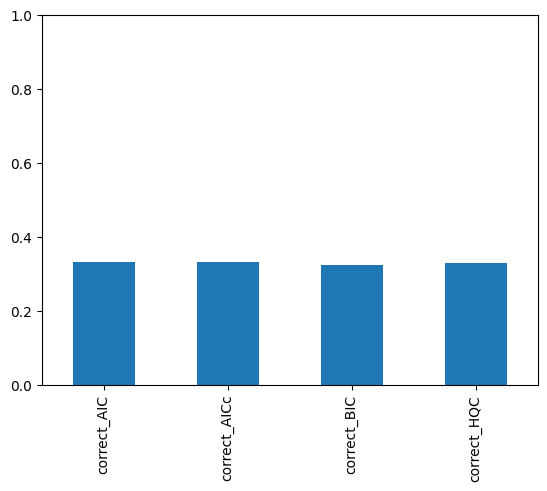

In [80]:
for ic in ics: 
    data["correct_"+ic] = data["true_model"] == data["best_model_"+ic]

#data=data.loc[data["true_model"]=="rw1_choice",]
data.filter(regex='^correct_').mean().plot.bar(ylim=[0,1])
print(data.filter(regex='^correct_').mean())



In [81]:
df = data.melt(id_vars=["value_noise", "choice_noise", "cutoff", "true_model", "algo", "best_model_AIC", "best_model_AICc", "best_model_BIC", "best_model_HQC"], 
               value_vars=["correct_"+ic for ic in ics]) 
df["IC"] = df["variable"].str.replace("correct_", "")

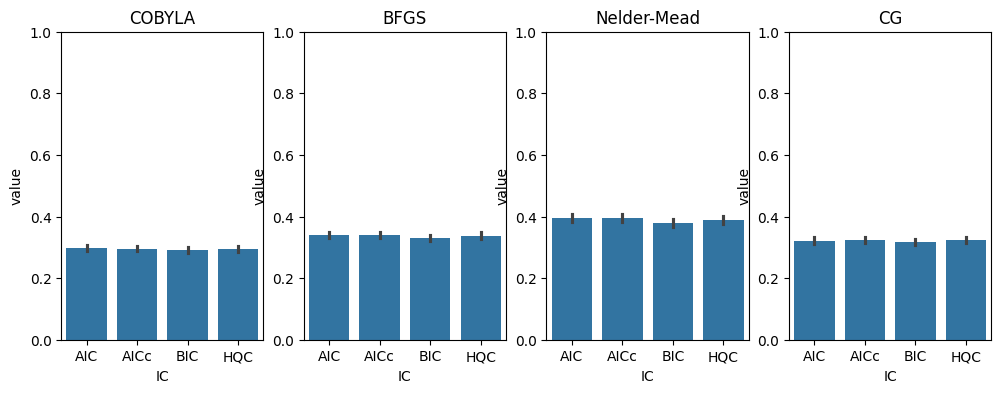

In [82]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["algo"].unique()):
    sns.barplot(data =df.loc[df["algo"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

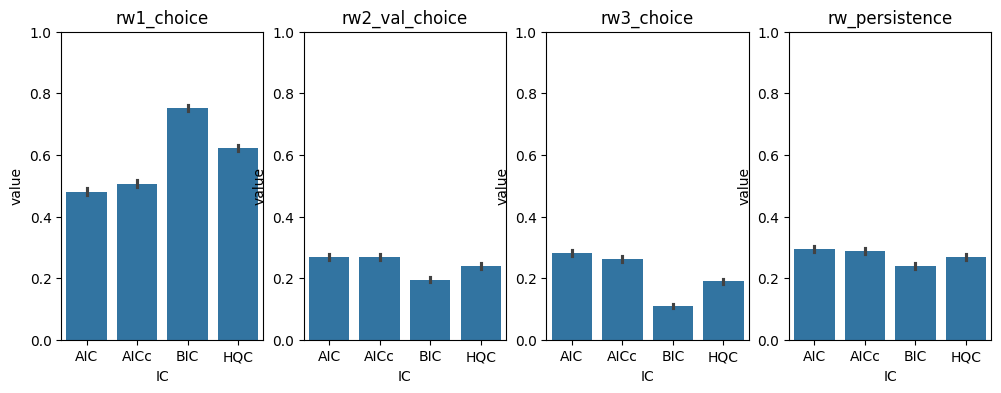

In [83]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["true_model"].unique()):
    sns.barplot(data =df.loc[df["true_model"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())


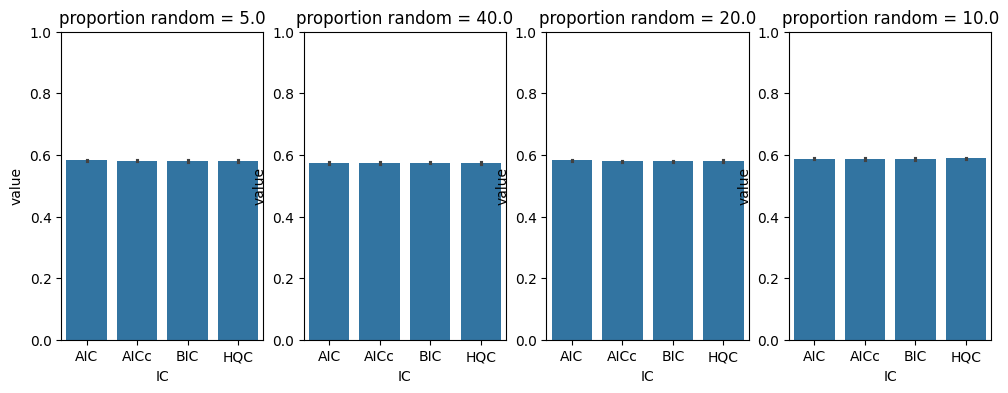

In [93]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(df["value_noise"].unique()):
    sns.barplot(data =df.loc[df["value_noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("proportion random = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



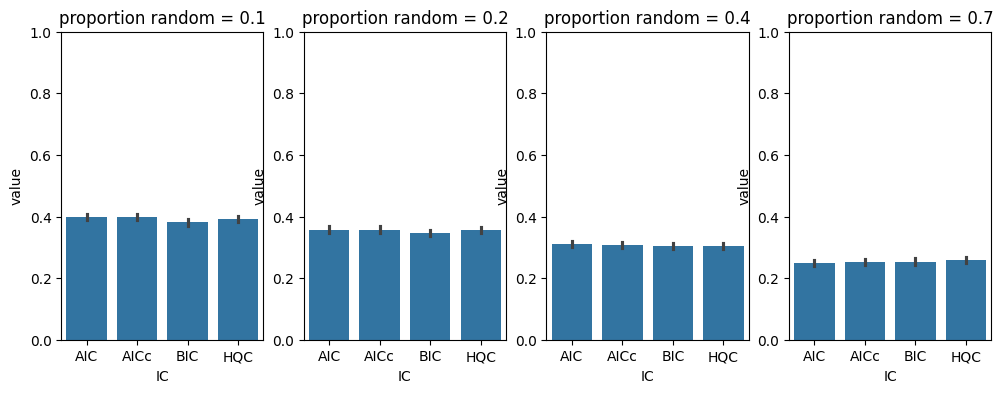

In [85]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(df["choice_noise"].unique()):
    sns.barplot(data =df.loc[df["choice_noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("proportion random = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())


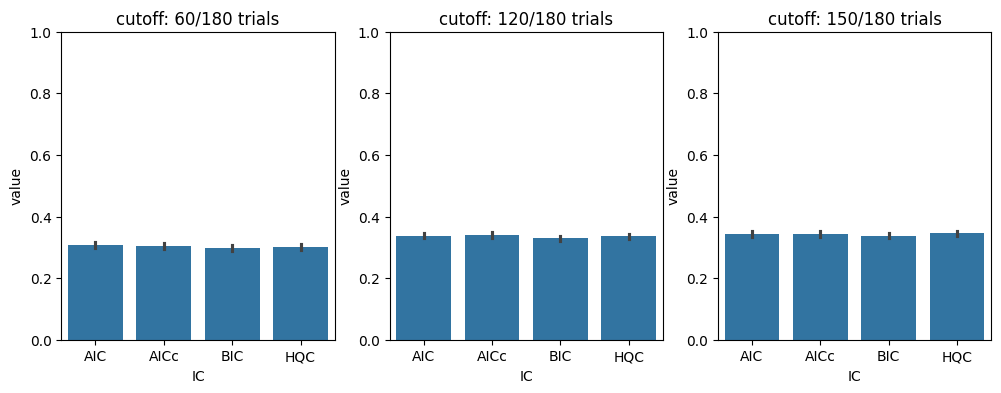

In [86]:
f, ax = plt.subplots(1,3,figsize=(12,4))
for aidx, a in enumerate([60, 120, 150]):
    sns.barplot(data =df.loc[df["cutoff"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("cutoff: "+str(a)+"/180 trials")
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



### accuracy
rate of correctly predicted choices

In [87]:
df = data.melt(id_vars=["value_noise", "choice_noise", "cutoff", "true_model", "algo", "best_model_AIC", "best_model_AICc", "best_model_BIC", "best_model_HQC"], 
               value_vars=["acc_"+ic for ic in ics]) 
df["IC"] = df["variable"].str.replace("acc_", "")

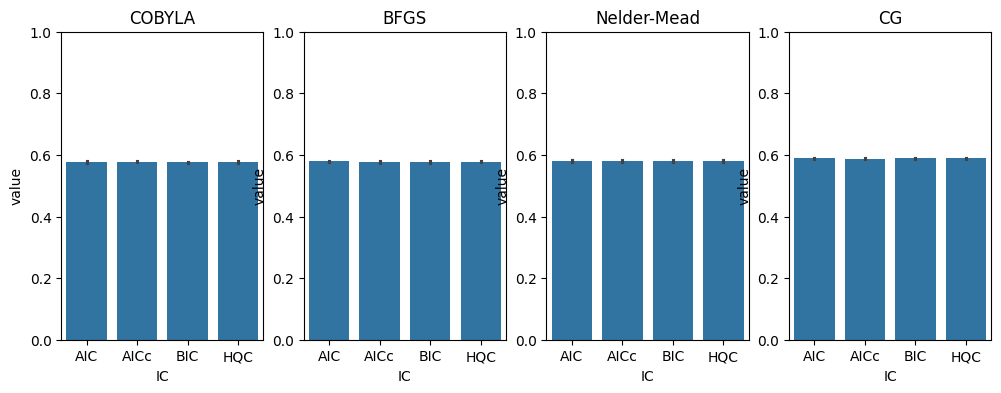

In [88]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["algo"].unique()):
    sns.barplot(data =df.loc[df["algo"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    #ax[0].set_ylabel("out-of-sample error")
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

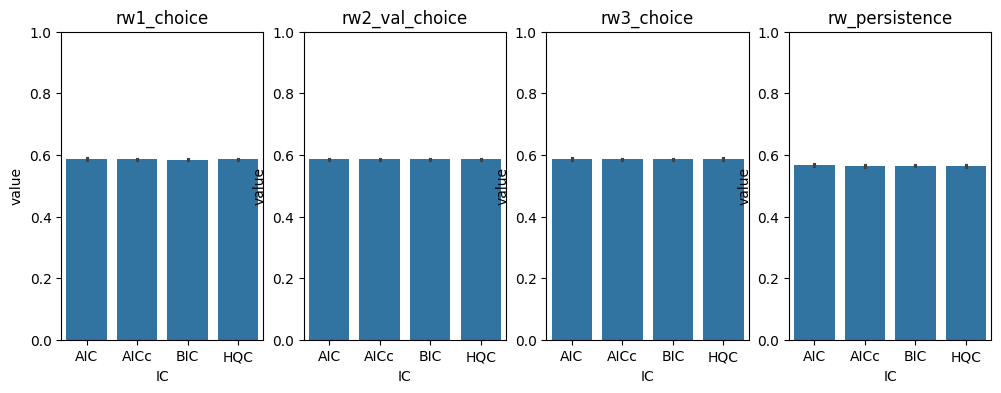

In [89]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["true_model"].unique()):
    sns.barplot(data =df.loc[df["true_model"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ##ax[0].set_ylabel("out-of-sample error")
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



KeyError: 'noise'

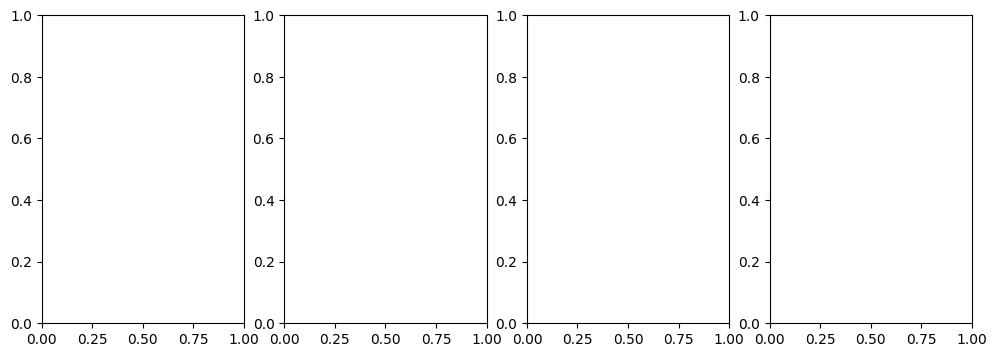

In [90]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate([0.1, 0.2, 0.4, 0.7]):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



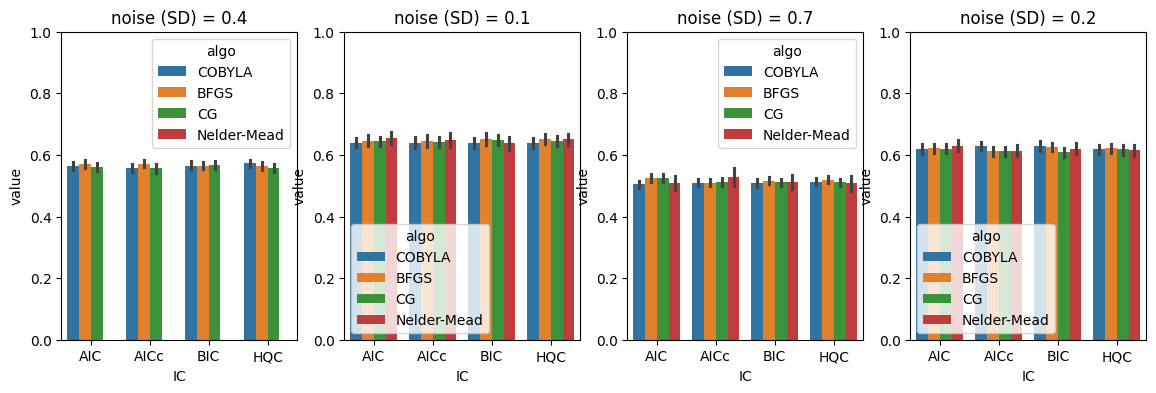

In [ ]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="algo", hue_order=df["algo"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

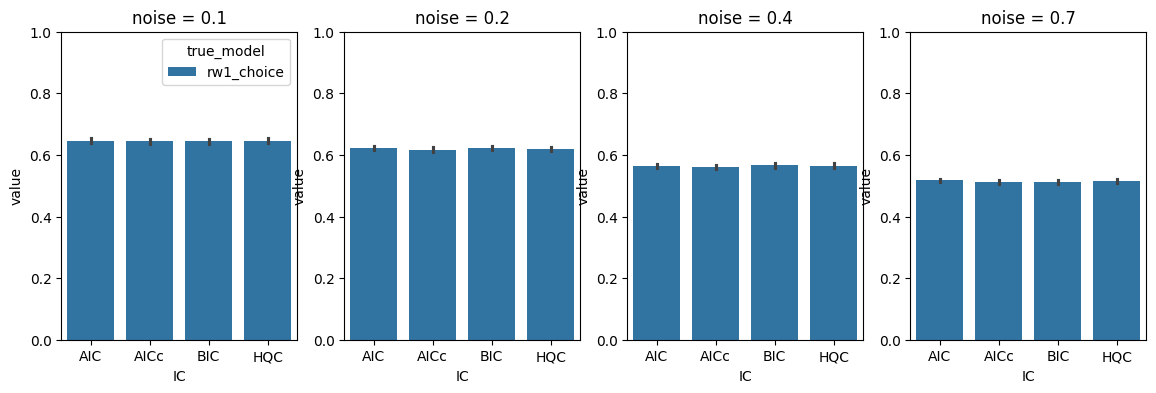

In [ ]:
f, ax = plt.subplots(1,4,figsize=(14,4))
leg = True
for aidx, a in enumerate([0.1, 0.2, 0.4, 0.7]):
    
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="true_model", hue_order=df["true_model"].unique(), ax=ax[aidx], legend=leg)
    ax[aidx].set_title("noise = "+str(a))
    ax[aidx].set_ylim([0,1])
    leg=False

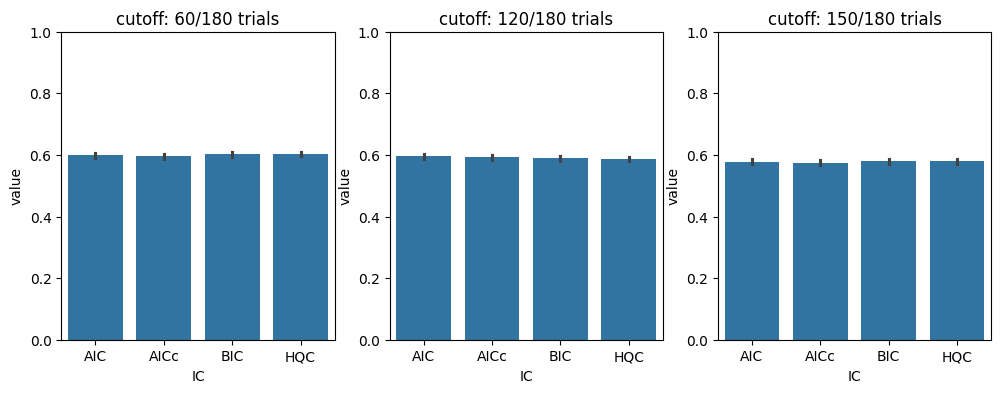

In [ ]:
f, ax = plt.subplots(1,3,figsize=(12,4))
for aidx, a in enumerate([60, 120, 150]):
    sns.barplot(data =df.loc[df["cutoff"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("cutoff: "+str(a)+"/180 trials")
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



acc_AIC     0.583333
acc_AICc    0.583333
acc_BIC     0.583333
acc_HQC     0.583333
dtype: float64


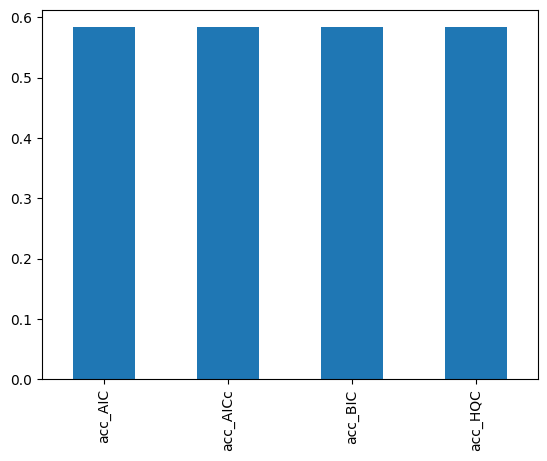

In [ ]:

data.filter(regex='^acc_').median().plot.bar()
print(data.filter(regex='^acc_').median())